# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

**Note:** Helpful descriptions of each category can be found at https://discussions.udacity.com/t/project-3-lots-of-guesswork/174839/2

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10, 245, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,3062,6154,13916,230,8933,2784
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.28 
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

For the **first establishment**, its purchases are above the mean in all categories, except for Fresh.  Of the three establishments, it purchases the most Frozen items.  This establishment serves food but uses limited perishable items.  Its Detergents_Paper spend is higher than average.  All signs point to this establishment to be a **restaurant**.

For the **second establishment**, its purchases are above average in every category, except for Fresh and Frozen.  Its Detergent_Paper purchases are higher than the other two selected establishments.  Detergents_Paper and Grocery purchases are well above average.  This establishment does not serve food but resells the items it purchases from this distributor.  My guess is that it is a **grocery store** with limited frozen products.

And finally, for the **third establishment**, the most notable observation is that its purchases are below average in every category except for Frozen, which is just above average.  A large percentage of its total spend appears to be food-related.  Since its cleaning supplies purchases are so low, I am guessing it does not serve food but resells it.  This establishment could be a small **convenience store**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
drop_feature = 'Grocery'
dropped_mean = data.describe()[drop_feature]['mean']
labels = data[drop_feature]
new_data = data.drop(drop_feature, axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "score = {}".format(score)

regressor.feature_importances_

score = 0.602801978878


C:\Users\patri\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.02813047,  0.06452529,  0.02474956,  0.86987718,  0.0127175 ])

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

1. I attempted to predict the **Grocery** value.
1. The reported prediction score is 0.60
1. The dropped feature, **Grocery** has high correlation with **Detergents_Paper**, making it redundant, so it is not necessary for identifying customers' spending habits.  Either **Grocery** or **Detergents_Paper** could be used interchangeably to accomplish this.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\patri\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


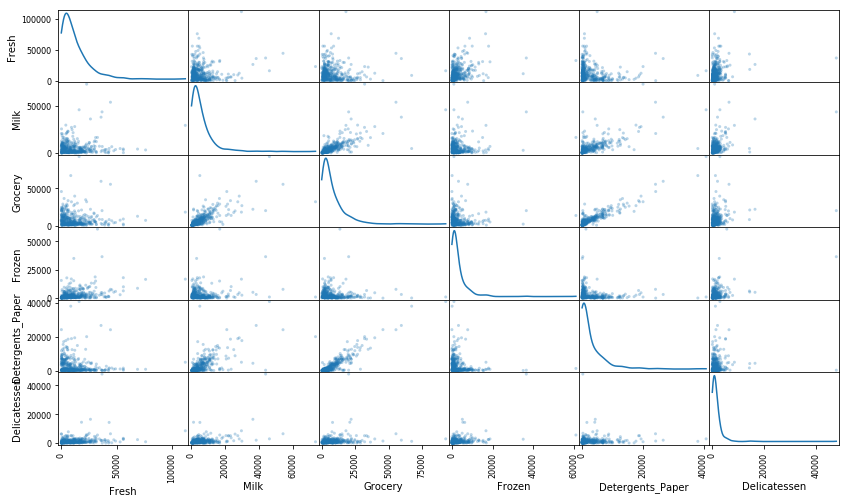

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [6]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


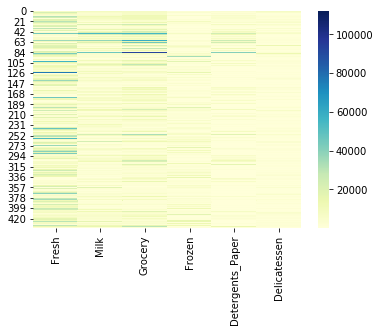

In [7]:
from seaborn import heatmap
heatmap(data, cmap="YlGnBu")

**Answer:**

* Looking at the scatter matrix, the distribution of the dataset is skewed right.  Most of the datapoints are clustered around the origin with a few extreme outliers.  This is not surprising as the table output from from running the `pandas.DataFrame.describe()` shows that the max value for each feature was significantly higher than their respective means, such as **Delicatessen** which has a mean of 1524.870455, a standard deviation of 2820.105937, and a max value of 47943.000000.
* The scatter matrix further suggests that there are some positively correlated features, specifically **Grocery | Detergents_Paper**, **Grocery | Milk**, **Detergents_Paper | Milk**.  The output from running the `pandas.DataFrame.corr()` function supports this observation with correlation coefficients of 0.924641, 0.728335, and 0.661816 respectively.
* These points support my suggestion that **Grocery** is an unnecesssary predictor of **Detergents_Paper** purchases.
* The scatter matrix shows that the **Grocery | Detergents_Paper**, **Grocery | Milk**, **Detergents_Paper | Milk** feature pairs are linearly distributed.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\patri\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


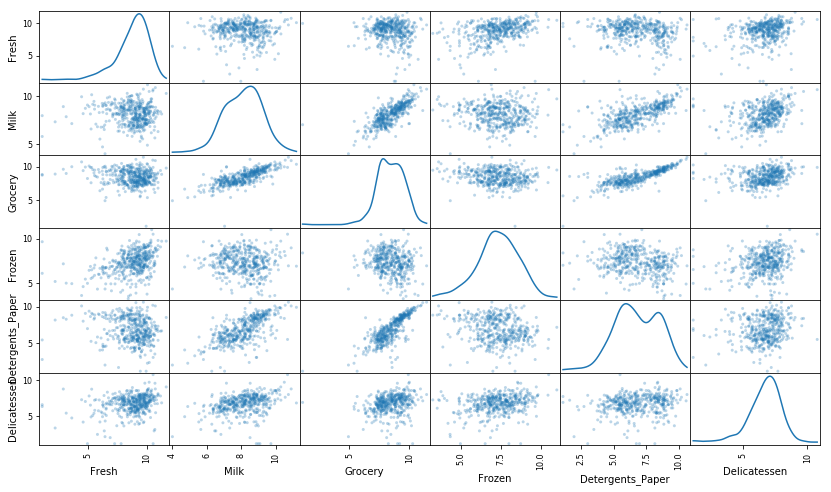

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
display(log_data.corr())

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,8.026824,8.724858,9.540795,5.438079,9.097508,7.931644
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
from collections import Counter

# Keep a counter for each instance outlier
cnt = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("Q1 = {} Q3 = {} step = {}".format(Q1, Q3, step))
    raw_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))] 
    display(raw_outliers)
    
    for row_num in list(raw_outliers.axes[0]):
        cnt[str(row_num)] += 1

print "Record index with number of features for which it is an outlier:"
display(cnt.most_common())

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Q1 = 8.04805870221 Q3 = 9.73706394795 step = 2.53350786861


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Q1 = 7.33498124004 Q3 = 8.88048008859 step = 2.31824827282


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
Q1 = 7.67461620137 Q3 = 9.27385367724 step = 2.3988562138


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
Q1 = 6.60967774917 Q3 = 8.17589608318 step = 2.34932750101


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Q1 = 5.54810142479 Q3 = 8.27434059875 step = 4.08935876094


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
Q1 = 6.01187465693 Q3 = 7.50672842655 step = 2.24228065442


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Record index with number of features for which it is an outlier:


[('154', 3),
 ('65', 2),
 ('66', 2),
 ('75', 2),
 ('128', 2),
 ('338', 1),
 ('193', 1),
 ('137', 1),
 ('175', 1),
 ('81', 1),
 ('86', 1),
 ('171', 1),
 ('289', 1),
 ('429', 1),
 ('183', 1),
 ('187', 1),
 ('184', 1),
 ('325', 1),
 ('420', 1),
 ('233', 1),
 ('285', 1),
 ('203', 1),
 ('145', 1),
 ('142', 1),
 ('343', 1),
 ('304', 1),
 ('305', 1),
 ('98', 1),
 ('109', 1),
 ('218', 1),
 ('264', 1),
 ('95', 1),
 ('161', 1),
 ('96', 1),
 ('38', 1),
 ('57', 1),
 ('357', 1),
 ('356', 1),
 ('355', 1),
 ('353', 1),
 ('412', 1),
 ('439', 1)]

In [11]:
# Let's look at the real, non-normalized values for these outliers
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    raw_outliers = data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))] 
    display(data[feature].describe())
    display(raw_outliers)


Data points considered outliers for the feature 'Fresh':


count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
81,219,9540,14403,283,7818,156
95,3,2920,6252,440,223,709
96,23,2616,8118,145,3874,217
128,140,8847,3823,142,1062,3
171,200,25862,19816,651,8773,6250
193,180,3485,20292,959,5618,666
218,18,7504,15205,1285,4797,6372
304,161,7460,24773,617,11783,2410


Data points considered outliers for the feature 'Milk':


count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,22925,73498,32114,987,20070,903
98,503,112,778,895,56,132
154,622,55,137,75,7,8
356,22686,134,218,3157,9,548


Data points considered outliers for the feature 'Grocery':


count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
154,622,55,137,75,7,8


Data points considered outliers for the feature 'Frozen':


count      440.000000
mean      3071.931818
std       4854.673333
min         25.000000
25%        742.250000
50%       1526.000000
75%       3554.250000
max      60869.000000
Name: Frozen, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,4591,15729,16709,33,6956,433
57,5417,9933,10487,38,7572,1282
65,85,20959,45828,36,24231,1423
145,22039,8384,34792,42,12591,4430
175,2343,7845,11874,52,4196,1697
264,1073,9679,15445,61,5980,1265
325,32717,16784,13626,60869,1272,5609
420,4456,5266,13227,25,6818,1393
429,8607,1750,3580,47,84,2501
439,2787,1698,2510,65,477,52


Data points considered outliers for the feature 'Detergents_Paper':


count      440.000000
mean      2881.493182
std       4767.854448
min          3.000000
25%        256.750000
50%        816.500000
75%       3922.000000
max      40827.000000
Name: Detergents_Paper, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,20398,1137,3,4407,3,975
161,12434,540,283,1092,3,2233


Data points considered outliers for the feature 'Delicatessen':


count      440.000000
mean      1524.870455
std       2820.105937
min          3.000000
25%        408.250000
50%        965.500000
75%       1820.250000
max      47943.000000
Name: Delicatessen, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,9,1534,7417,175,3468,27
109,1406,16729,28986,673,836,3
128,140,8847,3823,142,1062,3
137,3087,8080,8282,661,721,36
142,37036,7152,8253,2995,20,3
154,622,55,137,75,7,8
183,36847,43950,20170,36534,239,47943
184,327,918,4710,74,334,11
187,2438,8002,9819,6269,3459,3
203,583,685,2216,469,954,18


#### Experiment 1: Remove instances that are outliers in more than two features

C:\Users\patri\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


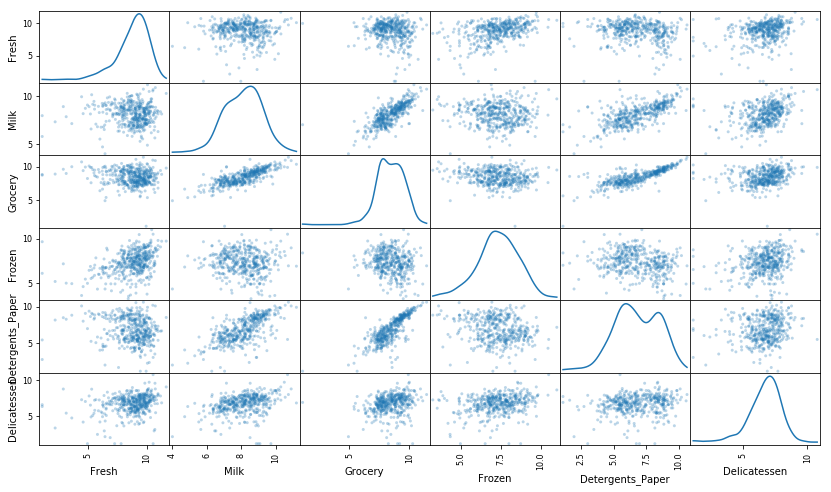

In [12]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
display(good_data.corr())

#### Experiment 2: Remove instances that are outliers in more than one feature

C:\Users\patri\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.024118,-0.129560,0.350749,-0.149014,0.212536
Milk,-0.024118,1.000000,0.779038,-0.064477,0.672506,0.332025
Grocery,-0.129560,0.779038,1.000000,-0.169742,0.790393,0.237129
Frozen,0.350749,-0.064477,-0.169742,1.000000,-0.214833,0.226074
Detergents_Paper,-0.149014,0.672506,0.790393,-0.214833,1.000000,0.160144
Delicatessen,0.212536,0.332025,0.237129,0.226074,0.160144,1.000000


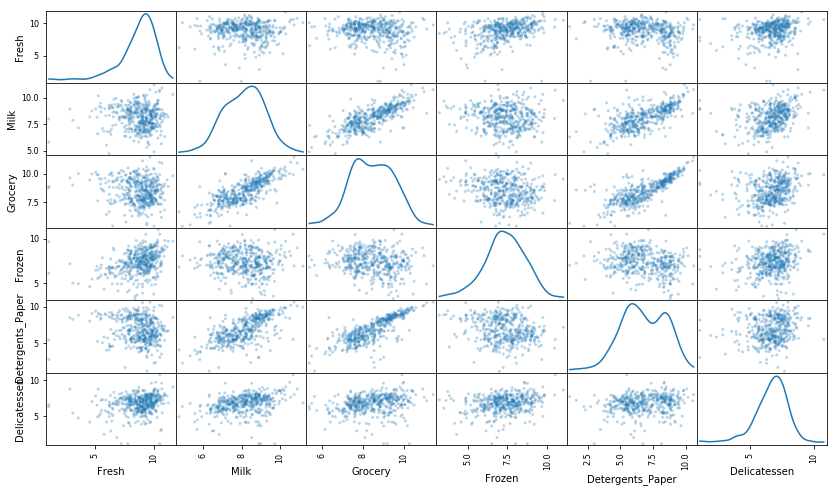

In [13]:
all_outliers_above_1 = [int(row) for row, _ in filter(lambda (row, val): val > 1, cnt.most_common())]
really_good_data = log_data.drop(log_data.index[all_outliers_above_1]).reset_index(drop = True)
pd.scatter_matrix(really_good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
display(really_good_data.corr())

#### Experiment 3: Remove all outliers

C:\Users\patri\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.064710,-0.057071,0.340518,-0.146229,0.191783
Milk,-0.064710,1.000000,0.780132,-0.074227,0.672005,0.385632
Grocery,-0.057071,0.780132,1.000000,-0.145911,0.793325,0.319726
Frozen,0.340518,-0.074227,-0.145911,1.000000,-0.181654,0.223868
Detergents_Paper,-0.146229,0.672005,0.793325,-0.181654,1.000000,0.174856
Delicatessen,0.191783,0.385632,0.319726,0.223868,0.174856,1.000000


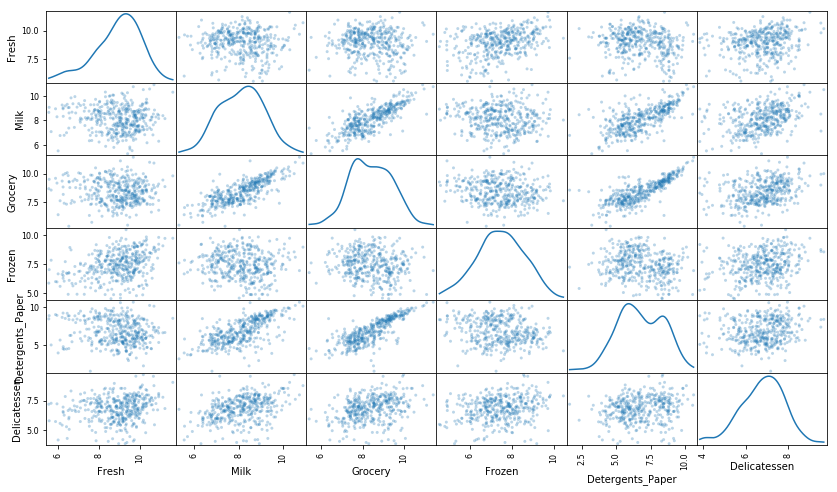

In [14]:
all_outliers = [int(row) for row, _ in cnt.most_common()]
really_really_good_data = log_data.drop(log_data.index[all_outliers]).reset_index(drop = True)
pd.scatter_matrix(really_really_good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
display(really_really_good_data.corr())

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [15]:
print "Number of instances that are outliers in more than one feature: {}".format(
    len(list(filter(lambda (x, y): y > 1, cnt.most_common()))))

Number of instances that are outliers in more than one feature: 5


**Answer:**
1. Yes, there are five data points that are outliers in more than one feature.
1. I do not believe it is necessary to remove these outliers from the dataset.  Doing so does not significantly improve the correlation coefficients for most of the logarithmically scaled feature pairs with perhaps the exception of some paired with the **Delicatessen** feature for which several of the correlation coefficients are lower.
1. I have decided not to remove any of the outliers, as logarithmcally scaling the features does an effective job at normalizing the values, even for the outliers.  Although, there are 35 total outliers, some being very far from the mean, there does not seem to be a compelling reason to remove them.  I have no basis to judge whether any of them have values that were entered erroneously.  As an example, row 154 has the following values:


In [16]:
data.iloc[154]

Fresh               622
Milk                 55
Grocery             137
Frozen               75
Detergents_Paper      7
Delicatessen          8
Name: 154, dtype: int64

These values are extremely low compared to the means of each feature.  Additionally, it is an outlier for five out of six feature cateogories.  This customer could potentially have been a new customer that put in its first order, which might explain the low values.  Or, it could be a customer that does very little business with the distributor as they may have other distributors that fulfill their needs.  I am not confident that there is a compelling reason that it should be removed.  I cannot think of any logical reason why this might not be a valid entry.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874],
       [-0.67351166,  0.03306794, -0.03218274,  0.28481122, -0.21824404,
         0.64459672],
       [-0.21432619,  0.0185577 ,  0.06448674,  0.80608348,  0.19005006,
        -0.51348977],
       [-0.00082162,  0.72228834,  0.34799325, -0.03624337, -0.56366476,
        -0.19536639],
       [-0.02927638,  0.54303508, -0.81390826, -0.0174477 ,  0.20244363,
        -0.02283197]])

array([ 0.44237417,  0.27657107,  0.11617342,  0.09617719,  0.0457568 ,
        0.02294735])

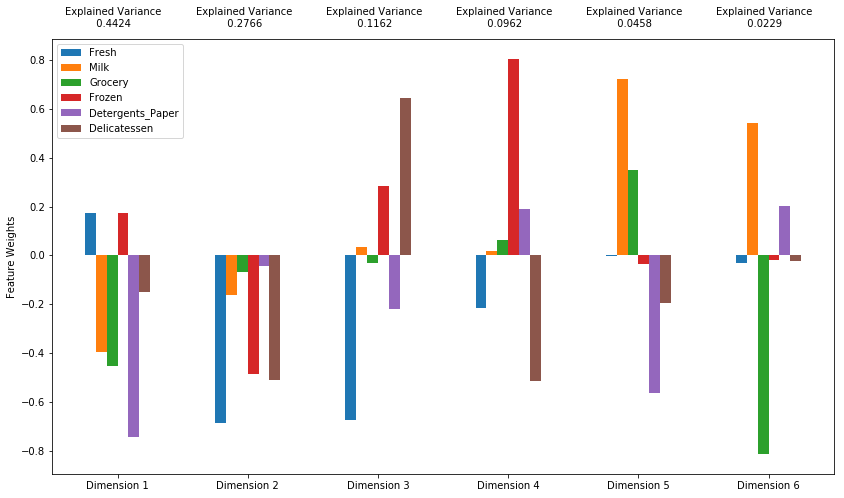

In [17]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA


pca = PCA(n_components=6, random_state=0)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca.components_)
display(pca.explained_variance_ratio_)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. The first and second principal components explain 70.68% of the data's variance.
1. 93.11% if data variance is explained by the first four principal components.
1. Here are a few points to note about the top four dimensions:

***Dimension 1***
- explains most of the variance in the data (44.3%)
- Detergents_Paper, Grocery and Milk are well-represented
- Best customer spending representation: Elementary school goods

***Dimension 2***
- explains the second most amount of the variance in the data (26.38%)
- has no overalapping data points with Dimension 1
- Fresh, Frozen, and Delicatessen are well-represented
- Best customer spending representation: All features in this dimension have negative weights, so I am inclined to believe that this dimension represents credits or discounts alloted to or returns from customers

***Dimension 3***
- explains 12.31% of the variance in the data
- has no overalapping data points with Dimension 1 and 2
- Fresh and Delicatessen have large magnitudes in opposite directions.  They have a strong negative correlation and very inversely for this dimension.  So, this must represent something that is strongly Delicatessen and very not Fresh, such as processed foods, like packaged salami or cartons of huumus, that you would find in the deli section of a market.
- Best customer spending representation: Prepackaged ready-to-eat deli items

***Dimension 4***
- explains 10.12% of the variance in the data
- has no overalapping data points with Dimension 1, 2, and 3
- For this dimension, Frozen and Delicatessen have large magnitudes and opposite directions, so they also vary inversely.  This dimension varies positively for Frozen items, and negatively for Deli items.  We can see that our algorithm is narrowing down the remaining data points.  This dimension represents Frozen items that do not contain Deli items.
- Best customer spending representation: Frozen non-deli, non-produce items:  Ice cream, frozen pizza, microwave meals.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns=pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.1162,-0.7488,0.8007,1.0355,-0.5710,-0.2135
1,-3.0935,0.4741,0.2398,-1.4801,-0.6635,-0.0750
2,2.4819,0.0446,1.0212,0.2059,-0.4992,-0.0051


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.1162,-0.7488
1,-3.0935,0.4741
2,2.4819,0.0446


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

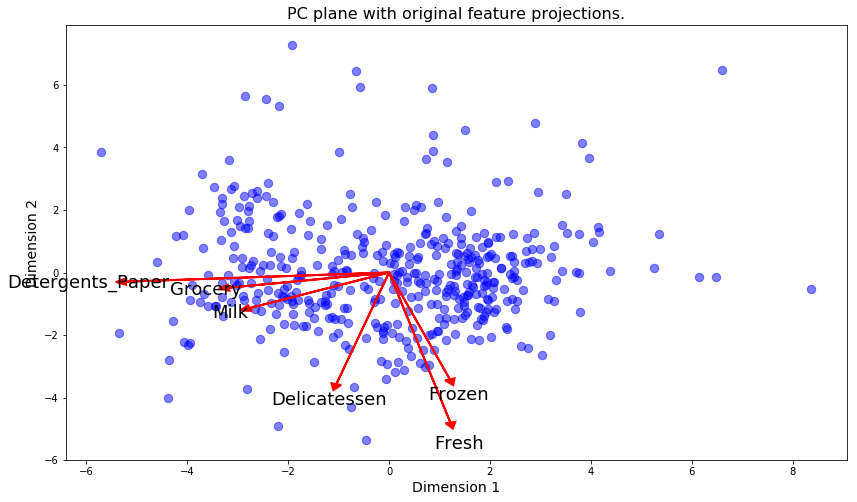

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

1. Advantages of using a K-Means-clustering algorithm:
    1. scales well on many realistic data sets
    1. relatively fast
    1. easy to implement and understand 
1. Advantages of using a Gaussian Mixture Model clustering algorithm:
    1. more flexibility in cluster covariance as data points are assigned to each cluster with a probability that it was generated by a cluster's normal distribution
    1. will not diverge
1. I will use the **Gaussian Mixture Model** as the dataset could benefit from the flexibility that GMM provides.
    

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


score = -1
preds = None
clusterer = None

for i in range(2, 11):
    tmp_clusterer = GaussianMixture(n_components=i, random_state=0).fit(reduced_data)
    tmp_preds = tmp_clusterer.predict(reduced_data)
    tmp_score = silhouette_score(reduced_data, tmp_preds)
    print "n_components = {} silhouette_score = {}".format(i, tmp_score)
    if tmp_score > score:
        clusterer = tmp_clusterer

        # TODO: Predict the cluster for each data point
        preds = tmp_preds

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = tmp_score
    
# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Sanity check: Make sure clusterer has n_components with highest silhouette score
print "\nclusterer.n_components = {}".format(clusterer.get_params()['n_components'])

n_components = 2 silhouette_score = 0.409968324528
n_components = 3 silhouette_score = 0.401945719377
n_components = 4 silhouette_score = 0.312142034867
n_components = 5 silhouette_score = 0.276392991644
n_components = 6 silhouette_score = 0.300884333928
n_components = 7 silhouette_score = 0.226660712115
n_components = 8 silhouette_score = 0.266311986685
n_components = 9 silhouette_score = 0.32690631316
n_components = 10 silhouette_score = 0.326250239747

clusterer.n_components = 2


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* For the "Report the silhouette score for several cluster numbers you tried", please refer to the output above.
* The number of clusters that has the best silhouette score is **2** with a score of **0.409968324528**.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

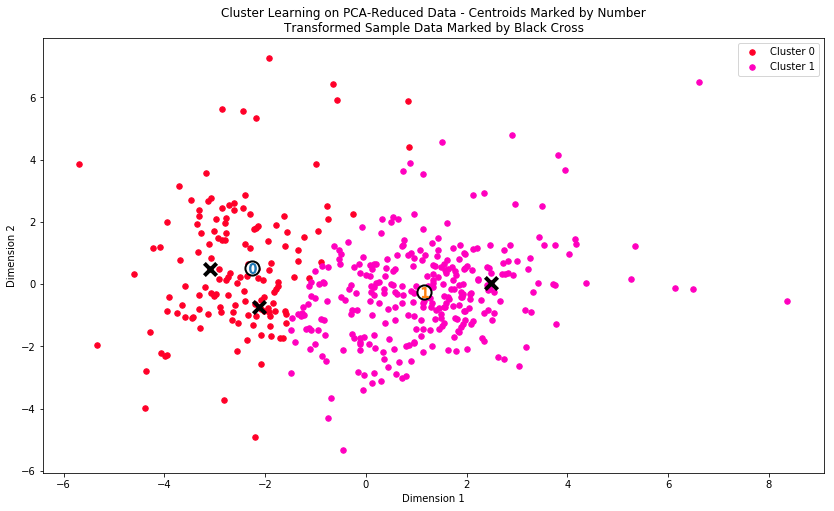

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2939.0,7576.0,12536.0,781.0,4702.0,848.0
Segment 1,9029.0,2229.0,2798.0,2051.0,380.0,754.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

**Segment 0:** With greater than average spend on Milk, Grocery, and Detergents_Paper and less-than-average spend on Fresh and Delicatessen, this segment would include establishments that do not prepare and serve food but do offer dry goods, food supplies, and limited ready-to-eat meals.  **Convenience stores** would likely characterize this segment.

**Segment 1:** This segment spends less than average in all categories with a greater proportion of its spend on food-related items and negligible spend on Detergents_Paper.  It is difficult to think of a business model that involves food that does not require cleaning products.  Perhaps, the closest type of establishment that fits this segment would be a **food stand or kiosk that dispenses ready-to-eat meals**.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

The segment predictions for the samples appear to be consistent.

**Samples 0 and 1** are within a reasonable range of purchases across all categories for Segment 0.  Their Grocery spend is above average, much like the average for Segment 0.

**Sample 2** shares the same characteristics of lower-than-average spend across all categories as Segement 1, except for **Frozen**, and the purchase amounts are generally lower.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

It would be unreasonable to assume that a change in delivery service would affect all customers equally, especially if certain customers, like restaurants, would need a more frequent delivery time when fresh ingredients are needed to maintain a high level of food quality.  High-volume Frozen or Detergents_Paper customers may not need delivery as frequently.

To determine which customers would react positively to a change in delivery service, we could sample customers from each cluster and perform an A/B test in each segment, where one set of customers gets deliveries 5 days a week and the other 3 days a week.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

There are a few options:
1. Use the clustering algorithm we developed to classify new customers with the target variable of the segment group, 0 or 1.
1. Label all of the existing data points with segment as the target variable and train a supervised algorithm to predict which segment new customers belong in.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

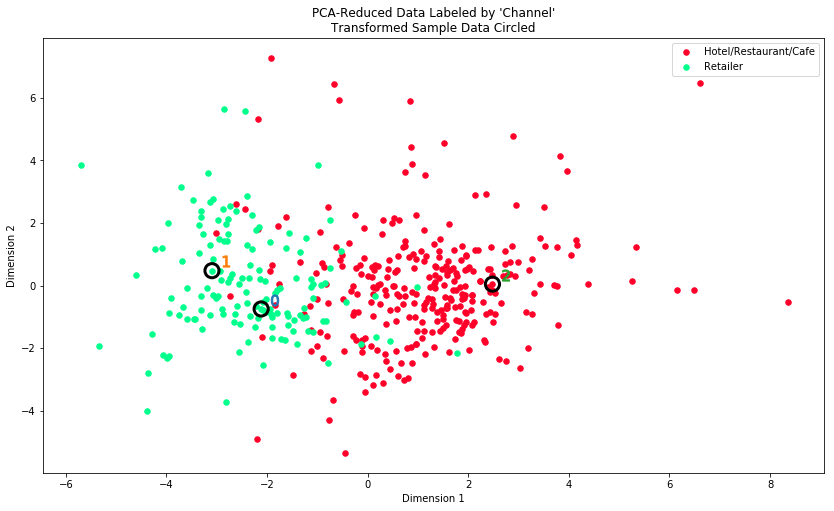

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* The Gaussian Mixture Model clustering algorithm along with the number of clusters of "2" that I have chosen compares well with the underlying distribution of Hotel/Restaurants/Cafe to Retailer customers, although it may have been more aggressive in classifying a customer as a Retailer than what the underlying distribution shows.
* I am not confident in saying that there are customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurant/Cafes' as the underlying distribution appears to have significant overlap between the two dimensions.  
* These classifications are inconsistent with my previous definition of the customer segments.  It seems I had it backwards, and it would have been more appropriate to switch the descriptions.  I had characterized Segment 0 as **Convenience stores** and Segment 1 as **food stand or kiosk that dispenses ready-to-eat meals**.  Based on the underlying distribution, it appears that these descriptions should be swapped.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.